<h1> <centering> ECE 653 Final Project: Check Your Perturbations </centering> </h1>
<h3> By Joseph Scott, Laura Graves, and Vineel Nagisetty </h3>

In [1]:
# clone the repo if running on colab
import warnings
warnings.filterwarnings('ignore')

try:
    import google.colab
    !git clone https://github.com/vin-nag/checkYourPerturbations.git
    !pip install func_timeout
    %cd ./checkYourPerturbations/
    inColab = True
except:
    %cd ./../
    inColab = False

/home/vineel/PycharmProjects/cs858/checkYourPerturbations/src


In [2]:
# imports
from src.generator.factory import GeneratorSelector, GeneratorTypes
from src.benchmark import BenchmarkEnums, Benchmark
from src.evaluator import Evaluator

Using TensorFlow backend.


In [3]:
# load the generators
selector = GeneratorSelector()
generators = selector.getAllGenerators()

# view the different generators
for generator in generators:
    print(generator)

DLFuzz
StepFuzz
NormFuzz
LaplaceFuzz
VinFuzz
bim
fgsm


In [4]:
# load and view the benchmark
benchmark = Benchmark(BenchmarkEnums.Demo)
benchmark.data.head(3)

[Errno 2] No such file or directory: './src/'
/home/vineel/PycharmProjects/cs858/checkYourPerturbations/src
Created benchmark with shape: (4, 4).


,modelName,model,image,label
0,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",9
1,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",1
2,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",3


Starting evaluation for DLFuzz:
	Evaluating model: robust for true label: 9
		Result: new label: 7, time: 13.6987, similarity: 0.434.


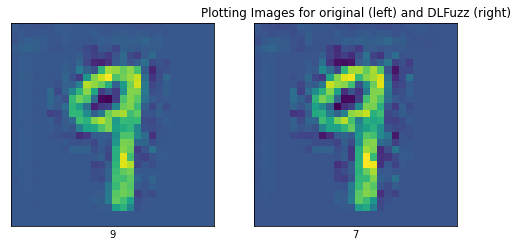

	Evaluating model: robust for true label: 1
		Result: new label: 7, time: 20.1338, similarity: 0.9068.


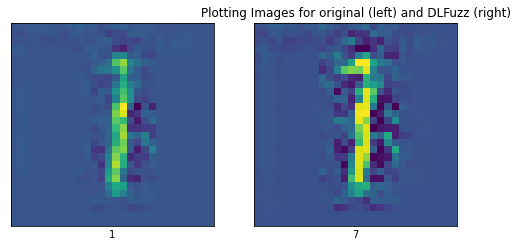

	Evaluating model: robust for true label: 3
		Result: timed out.
	Evaluating model: robust for true label: 7
		Result: timed out.
Starting evaluation for StepFuzz:
	Evaluating model: robust for true label: 9
		Result: timed out.
	Evaluating model: robust for true label: 1
		Result: new label: 7, time: 23.6182, similarity: 3.1391.


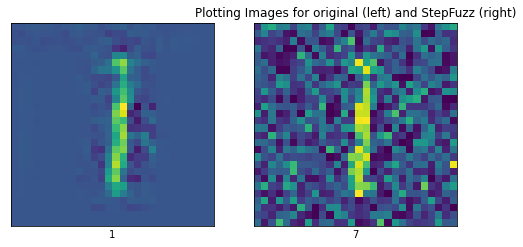

	Evaluating model: robust for true label: 3
		Result: timed out.
	Evaluating model: robust for true label: 7
		Result: timed out.
Starting evaluation for NormFuzz:
	Evaluating model: robust for true label: 9
		Result: new label: 7, time: 12.8693, similarity: 3.3622.


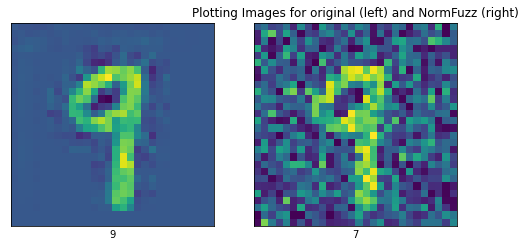

	Evaluating model: robust for true label: 1


Exception ignored in: <bound method ScopedTFGraph.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFGraph object at 0x7f960e74fa20>>
Traceback (most recent call last):
  File "/home/vineel/PycharmProjects/cs858/checkYourPerturbations/venv/lib/python3.6/site-packages/tensorflow/python/framework/c_api_util.py", line 54, in __del__
    self.deleter(self.graph)
AttributeError: 'ScopedTFGraph' object has no attribute 'deleter'


		Result: timed out.
	Evaluating model: robust for true label: 3
		Result: timed out.
	Evaluating model: robust for true label: 7


Exception ignored in: <bound method ScopedTFGraph.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFGraph object at 0x7f960e446470>>
Traceback (most recent call last):
  File "/home/vineel/PycharmProjects/cs858/checkYourPerturbations/venv/lib/python3.6/site-packages/tensorflow/python/framework/c_api_util.py", line 54, in __del__
    self.deleter(self.graph)
AttributeError: 'ScopedTFGraph' object has no attribute 'deleter'


		Result: timed out.
Starting evaluation for LaplaceFuzz:
	Evaluating model: robust for true label: 9
		Result: new label: 3, time: 9.2236, similarity: 3.4851.


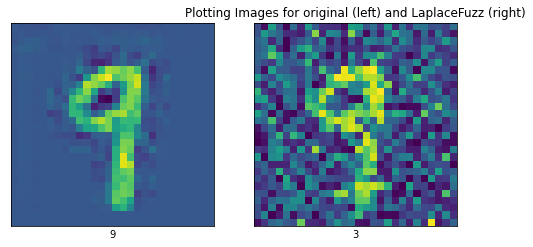

	Evaluating model: robust for true label: 1
		Result: new label: 7, time: 10.3598, similarity: 3.5743.


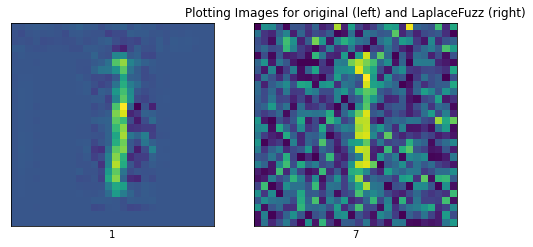

	Evaluating model: robust for true label: 3
		Result: new label: 8, time: 24.5475, similarity: 5.564.


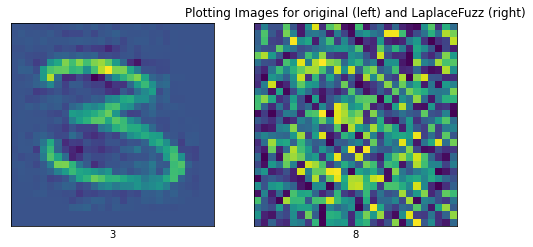

	Evaluating model: robust for true label: 7
		Result: timed out.
Starting evaluation for VinFuzz:
	Evaluating model: robust for true label: 9
		Result: timed out.
	Evaluating model: robust for true label: 1
		Result: timed out.
	Evaluating model: robust for true label: 3
		Result: timed out.
	Evaluating model: robust for true label: 7
		Result: timed out.
Starting evaluation for bim:
	Evaluating model: robust for true label: 9
reached
		Result: new label: 7, time: 0.281, similarity: 1.0524.


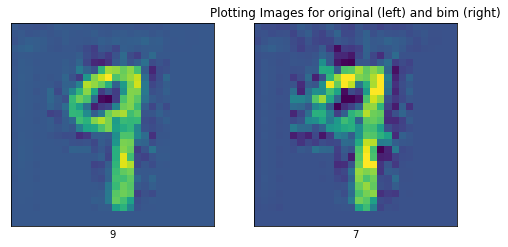

	Evaluating model: robust for true label: 1
reached
		Result: new label: 7, time: 0.1586, similarity: 1.2547.


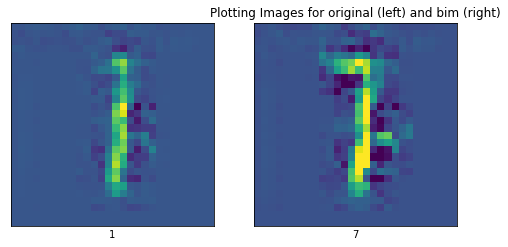

	Evaluating model: robust for true label: 3
reached
		Result: new label: 5, time: 0.1487, similarity: 1.3022.


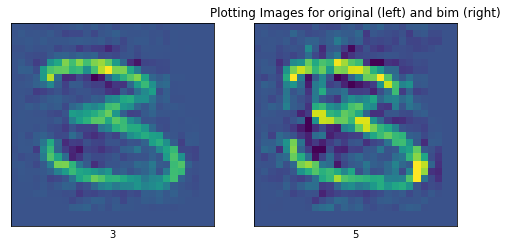

	Evaluating model: robust for true label: 7
reached
		Result: new label: 9, time: 0.1653, similarity: 1.1883.


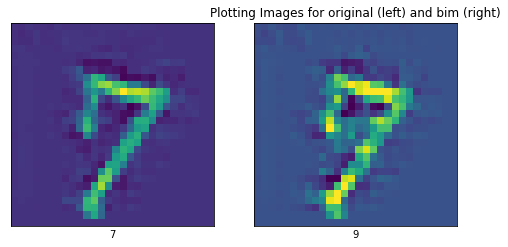

Starting evaluation for fgsm:
	Evaluating model: robust for true label: 9
reached
		Result: new label: 7, time: 0.1491, similarity: 0.1375.


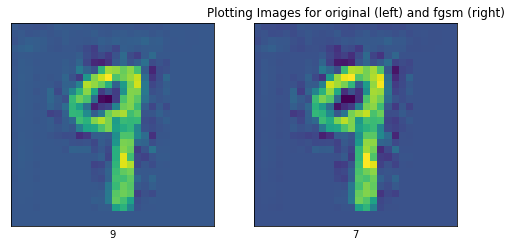

	Evaluating model: robust for true label: 1
reached
		Result: new label: 7, time: 0.2117, similarity: 0.4033.


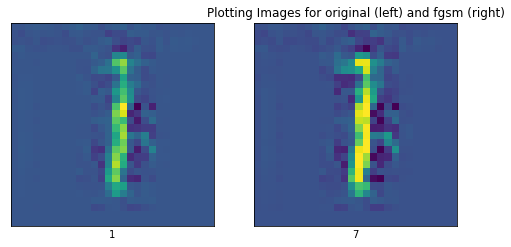

	Evaluating model: robust for true label: 3
reached
		Result: new label: 5, time: 0.3227, similarity: 0.5734.


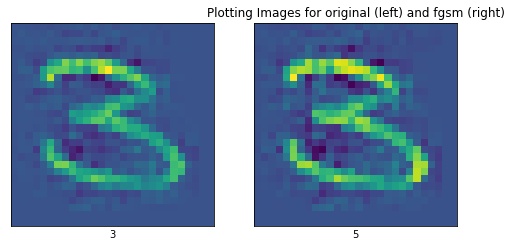

	Evaluating model: robust for true label: 7
reached
		Result: new label: 9, time: 0.2321, similarity: 0.3495.


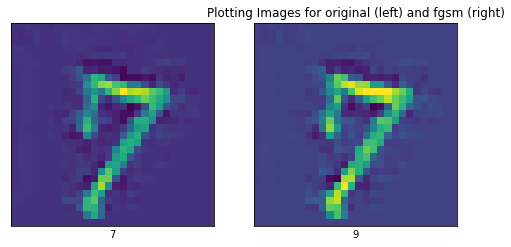

Completed Evaluation.


In [5]:
# perform evaluation
evaluator = Evaluator(benchmark=benchmark, generators=generators)
evaluator.evaluate(timeMax=25)